#Mini Project 1

##Setup

In [ ]:
import requests #library
from bs4 import BeautifulSoup as bs
import pandas as pd
from IPython.core.display import HTML #to display images

In [ ]:
#use request library
r = requests.get("https://www.skinnytaste.com/recipe-index/")

soup = bs(r.text, 'html.parser')

##Scraping with BeautifulSoup

I encountered some issues with the images and the summaries, as the wrapping of the tags varied from recipe to recipe.

In order to handle the cases where the entry was a collection of recepies (and thus had no metadata such as calories or points), I have filtered out recipes that did not have a points span. I concluded that extracting each recipe from collection articles would be too inefficient.

To handle the inconsistent wrapping of the image tags on the title page, I opted to scrape the thumbnail on the index page, resulting in a smaller image but simpler scraping.

I encountered a problem with duplicate recipes, so I keep track of visited URL:s to exclude duplicates.

In [ ]:
recipe_list = soup.find_all(class_="post-content")
#print(recipie_list)

In [ ]:
#lists to create DF from

url_list = []
title_list = []
image_list = []
calories_list = []
points_list = []
summary_list = []
key_list = []

#handle duplicates by tracking recipe urls
processed_urls = []

#to count amount of recipes in scraping, used for following along in the scraping via print statements
testing_counter = 0

for i in range(1,51):
  #find right page index
  url = f"https://www.skinnytaste.com/recipe-index/?_paged={i}.html"

  soup = bs(requests.get(url).text, 'html.parser')
  all_recipes = soup.find_all("article")

  for recipe in all_recipes:
    recipe_url = recipe.find('a')['href']

    #Check that url has not been processed
    if recipe_url in processed_urls:
      continue
    processed_urls.append(recipe_url)

    image_url = recipe.find('img')['src'] #image url from index page, formatting varies on title page

    #access recipe title page for parsing
    recipe_soup = bs(requests.get(recipe_url).text, 'html.parser')

    #for eliminating articles containing recipe collections, points span required
    points_span = recipe_soup.find("span", title="WW Points")

    #if the recipe has a points span = scrape it
    if points_span and points_span.text.strip():

      #add url to list if article has value for point variable
      url_list.append(recipe_url) #add link
      image_list.append(image_url) #add image

      #title
      title = recipe_soup.find("h1", class_="entry-title").string
      title_list.append(title)

      #key
      categories = []
      category_list = recipe_soup.find("ul", class_="cat-icons post-icons")
      if category_list:
        for item in category_list.find_all("li"):
          category = item.find("a")["title"]
          categories.append(category)
      key_list.append(categories)

      #calories
      calories_span = recipe_soup.find("span", title="Calories")
      calories = calories_span.text.strip().split()[-1]
      calories_list.append(calories)
      #print("Calories: " + calories)

      #points
      points_span = recipe_soup.find("span", class_="recipe-meta-value")
      points = points_span.text.strip().replace(" ", "")
      points_list.append(points)
      #print("Points: " + points)

      #summary
      summary_paragraph = recipe_soup.find("div", class_="entry-content").find("p")
      summary = summary_paragraph.get_text(strip=True)  #get text ignores links
      summary_list.append(summary)
      #print(summary)

      testing_counter += 1 #prints a number before the tests when scraping


      #print statements to visualize the scraping process
      print(f"{testing_counter}, {title}")
      #print(f"Points: {points}, Calories {calories}, key: {categories}")
      #print(f"Image: {image_url}")
      #print(f"Summary: {summary}")
      #print(categories)




1, Pumpkin Pancake Muffins
2, Roasted Butternut Squash Feta Soup
3, Breakfast Burritos
4, Crustless Pumpkin Pie
5, Red Curry Salmon
6, Apple Butter
7, Roasted Delicata Squash
8, Apple Bread
9, Autumn Salad with Pears and Gorgonzola
10, Sesame Chicken
11, Bacon in the Oven
12, Pumpkin Spice Latte
13, Homemade Hamburger Helper
14, Fried Brown Rice
15, Asian Grilled Chicken
16, Sweet Potato Salad
17, Ratatouille
18, Pretzel Crusted Chicken Tenders
19, Lemon Vinaigrette
20, Slow Cooker Beef Stew
21, Deviled Egg Salad
22, Shrimp and Rice (Arroz Con Camarones)
23, Bruschetta Pasta Salad
24, Watermelon Feta Salad
25, Coconut Popsicles
26, Sheet Pan Shrimp with Corn and Tomatoes
27, Strawberry Yogurt Bark
28, Broccoli Cauliflower Salad
29, Juicy Grilled Pork Chops
30, Grilled Eggplant with Feta
31, Korean Chicken
32, Blueberry Zucchini Bread
33, Green Goddess Dressing
34, Watermelon Cucumber Granita
35, High Protein Whipped Cottage Cheese Bowls
36, Hot Crab Dip
37, Virgin Mojito (Nojito)
38, F

In [ ]:
#ensure all lists are of equal length for data frame, testing purpose
print(len(url_list))
print(len(title_list))
print(len(image_list))
print(len(calories_list))
print(len(points_list))
print(len(summary_list))
print(len(key_list))

938
938
938
938
938
938
938


In [ ]:
#convert all points to integers
points_list = [int(i) for i in points_list]

#convert all calories to floats
calories_list = [float(i) for i in calories_list]



##Creating the Data Frame


After scraping and filtering out recipe collection articles I end up with 938 recipes (22.9.2024).



In [ ]:
df_all = pd.DataFrame({'Title':title_list,'Calories':calories_list, 'Points':points_list, 'Images':image_list, 'Keys':key_list, 'Summary':summary_list, 'URL':url_list})
df_all


,Title,Calories,Points,Images,Keys,Summary,URL
0,Pumpkin Pancake Muffins,244.0,6,https://www.skinnytaste.com/wp-content/uploads...,"[Freezer Meals, Kid Friendly, Meal Prep Recipe...",Pumpkin pancake muffins are pancakes convenien...,https://www.skinnytaste.com/pumpkin-pancake-mu...
1,Roasted Butternut Squash Feta Soup,200.0,5,https://www.skinnytaste.com/wp-content/uploads...,"[Gluten Free, High-Fiber Recipes, Vegetarian M...",You’re going to love my take on the viral shee...,https://www.skinnytaste.com/butternut-squash-f...
2,Breakfast Burritos,261.0,5,https://www.skinnytaste.com/wp-content/uploads...,"[Air Fryer Recipes, Freezer Meals, High-Fiber ...",These freezerbreakfastburritos are stuffed wit...,https://www.skinnytaste.com/freezer-breakfast-...
3,Crustless Pumpkin Pie,124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"[Dairy Free Recipes, Gluten Free, High-Fiber R...","Skip the crust and make this easy gluten-free,...",https://www.skinnytaste.com/crustless-pumpkin-...
4,Red Curry Salmon,349.0,6,https://www.skinnytaste.com/wp-content/uploads...,"[Dairy Free Recipes, Gluten Free, High Protein...",Thai-inspired Red Curry Salmon is simmered in ...,https://www.skinnytaste.com/red-curry-salmon/
...,...,...,...,...,...,...,...
933,Seattle Smoked Salmon Chowder,377.0,8,https://www.skinnytaste.com/wp-content/uploads...,"[High-Fiber Recipes, Pressure Cooker Recipes]",This creamy Smoked Salmon Chowder is truly com...,https://www.skinnytaste.com/smoked-salmon-chow...
934,Instant Pot Corned Beef and Cabbage,359.5,6,https://www.skinnytaste.com/wp-content/uploads...,"[Freezer Meals, Gluten Free, High-Fiber Recipe...",This easyInstant PotCorned Beef and Cabbagerec...,https://www.skinnytaste.com/instant-pot-corned...
935,Cream of Broccoli Soup,150.0,4,https://www.skinnytaste.com/wp-content/uploads...,"[Gluten Free, Kid Friendly, Low Carb, Under 30...",Cream of Broccoli Soup is a favorite of comfor...,https://www.skinnytaste.com/cream-of-broccoli-...
936,Cilantro-Lime Fish Tacos,310.0,5,https://www.skinnytaste.com/wp-content/uploads...,"[Gluten Free, High-Fiber Recipes, Kid Friendly...",These easy Cilantro Lime Fish Tacos are made w...,https://www.skinnytaste.com/cilantro-lime-tila...


##Analysis


Basic stats about calories and points.

In [ ]:
df_all.describe()

,Calories,Points
count,938.000000,938.000000
mean,237.344670,4.974414
std,116.436586,2.792998
min,8.000000,0.000000
25%,146.625000,3.000000
50%,226.000000,5.000000
75%,308.000000,7.000000
max,608.000000,13.000000


Box plots for distributions of both calories and points.

<Axes: >

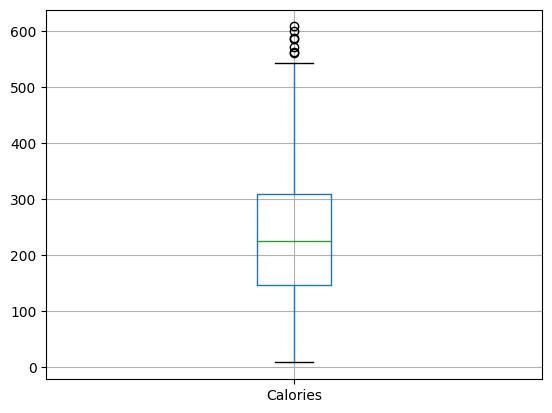

In [ ]:
#boxplot of distribution of calories in DF
df_all.boxplot(column=['Calories'])

<Axes: >

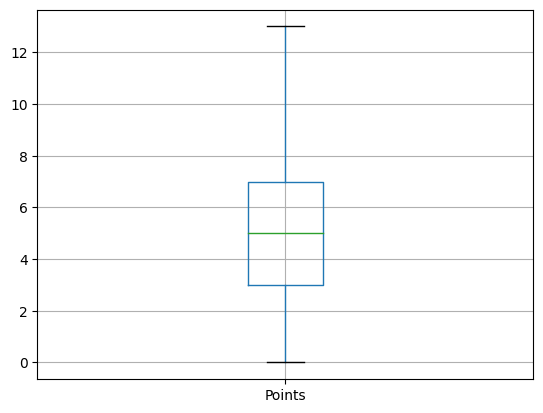

In [ ]:
#boxplot of points
df_all.boxplot(column=['Points'])

Distibution of recipe categories, one recipe can have multiple categories.

<Axes: xlabel='Keys'>

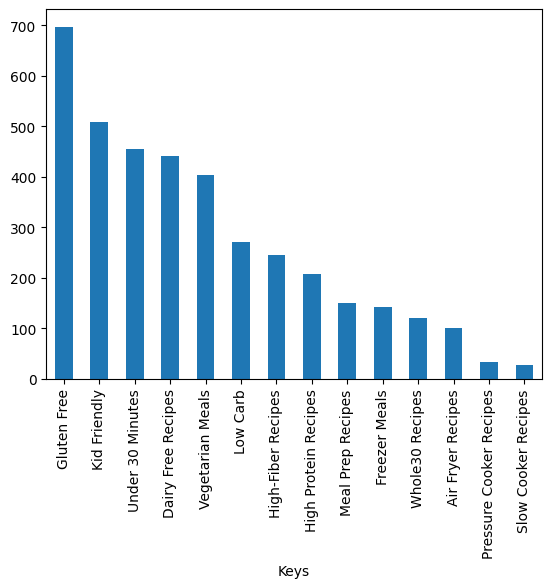

In [ ]:
#visualize category distribution with bar
category_counts = df_all['Keys'].explode().value_counts()
category_counts.plot(kind='bar')


## Observations for report

<Axes: xlabel='Keys'>

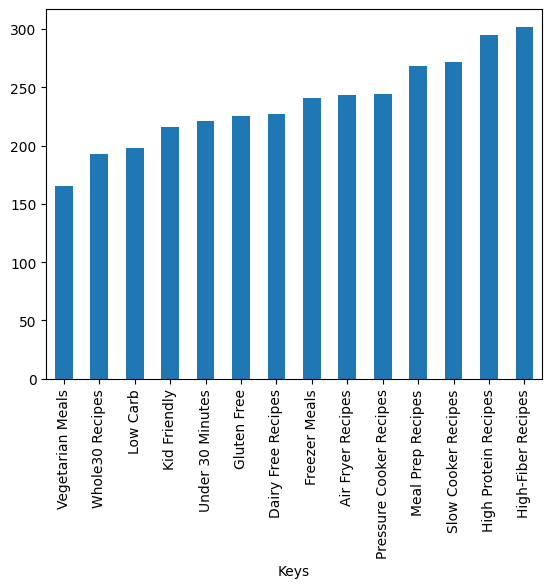

In [ ]:
#median for least calories of each individual key value in bar chart
df_all.explode('Keys').groupby('Keys')['Calories'].median().sort_values().plot(kind='bar')


<Axes: xlabel='Keys'>

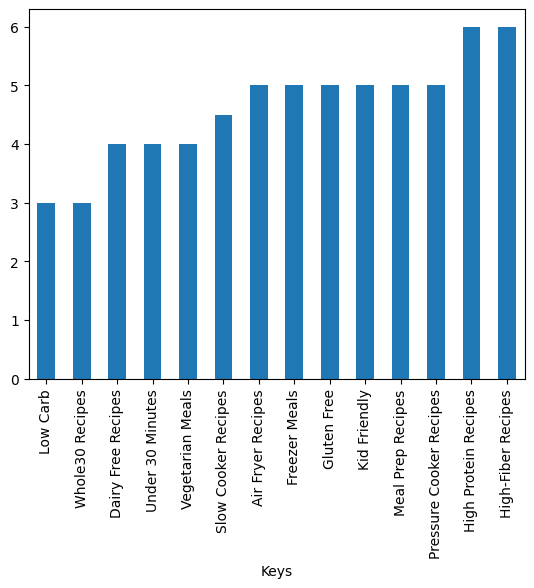

In [ ]:
#Categories with smallest medians for points
df_all.explode('Keys').groupby('Keys')['Points'].median().sort_values().plot(kind='bar')

In [ ]:
#print above medians for calories and points per group in tables
display(df_all.explode('Keys').groupby('Keys')['Calories'].median().sort_values())
display(df_all.explode('Keys').groupby('Keys')['Points'].median().sort_values())

,Calories
Keys,
Vegetarian Meals,165.00
Whole30 Recipes,192.50
Low Carb,198.00
Kid Friendly,216.00
Under 30 Minutes,221.00
Gluten Free,225.00
Dairy Free Recipes,227.00
Freezer Meals,241.00
Air Fryer Recipes,243.00


,Points
Keys,
Low Carb,3.0
Whole30 Recipes,3.0
Dairy Free Recipes,4.0
Under 30 Minutes,4.0
Vegetarian Meals,4.0
Slow Cooker Recipes,4.5
Air Fryer Recipes,5.0
Freezer Meals,5.0
Gluten Free,5.0




##Function with input option

This function takes in a range of both calories and points, and outputs a list of up to top 10 recipes with ascending calories. There can of course be two different functions for points and calories, but I got the feeling they should be combined in one function. Images are displayed.

I also opted to display the calories, points and a clickable link to the recipe.


In [ ]:
def path_to_image_html(path):
    return '<img src="' + path + '" width="150" >'

#turn url to link in df
def url_to_link(path):
    return '<a href="' + path + '">Link to the recipe</a>'


def top_10_based_on_user_ranges(df_all):
    # Input from user
    min_calories = int(input("Enter minimum calories: "))
    max_calories = int(input("Enter maximum calories: "))
    min_points = int(input("Enter minimum points: "))
    max_points = int(input("Enter maximum points: "))

    # Validate user input
    if max_calories >= min_calories and max_points >= min_points:
        # Filter the DataFrame based on user input
        filtered_df = df_all[
            (df_all['Calories'] >= min_calories) &
            (df_all['Calories'] <= max_calories) &
            (df_all['Points'] >= min_points) &
            (df_all['Points'] <= max_points)
        ]

        # Sort the DataFrame by Calories
        filtered_df = filtered_df.sort_values(by='Calories', ascending=True)

        # Select specific columns
        filtered_df = filtered_df[['Title', 'Images', 'Calories', 'Points', 'Summary', 'URL']]

        # Generate HTML
        html = filtered_df.head(10).to_html(escape=False, formatters={'Images': path_to_image_html,'URL': url_to_link})

        # Display HTML
        display(HTML(html))
    else:
        print("Maximum must be larger than minimum")


top_10_based_on_user_ranges(df_all)

Enter minimum calories: 70
Enter maximum calories: 150
Enter minimum points: 4
Enter maximum points: 4


,Title,Images,Calories,Points,Summary,URL
501,Roasted Strawberry Banana Bread,,88.0,4,"This Strawberry Banana Bread recipe is moist and delicious, made with ripe bananas and roasted strawberries, which brings out the sweetness of the berries.",Link to the recipe
492,Chocolate Frozen Yogurt in the Ninja™ CREAMi®,,88.0,4,"Whip up this delicious Chocolate Frozen Yogurt from scratch any night of the week! Simply prep your base, freeze overnight, process, and enjoy!",Link to the recipe
867,Caprese Salad,,100.0,4,"Caprese Salador Insalata Caprese is a simple summer salad with fresh mozzarella, thick slices of juicy tomatoes, basil and a splash of balsamic vinegar. Serve it as anappetizer, side dish, or just make it a meal!",Link to the recipe
837,Mashed Sweet Potatoes Brulee,,100.0,4,Mashed Sweet Potatoes Brulee are seasoned with with a hint of cinnamon and nutmeg topped with a caramelized brown sugar crust.,Link to the recipe
722,Skillet Mexican Zucchini,,102.0,4,"Skillet Mexican Zucchini is incredibly delicious with a little bit of a kick from the jalapeño topped with melted queso blanco. So easy and quick, a must try!",Link to the recipe
231,Grilled Pineapple,,102.0,4,"This quick and easy Grilled Pineapple with honey, lime juice, and cinnamon is the perfectdessertfor summer dinners or backyard parties!",Link to the recipe
798,Chocolate Pistachio Biscotti,,103.0,4,Chocolate Pistachio Biscotti are perfect for holiday baking or giving away to friends!,Link to the recipe
659,Orange Moscow Mule Mocktail,,104.0,4,"This Orange Moscow Mule Mocktail is delicious, perfect if you want a grown up adult cocktail without the alcohol.",Link to the recipe
353,Spinach Dip Stuffed Mushrooms,,105.0,4,"If you lovespinach dipand stuffed mushrooms, you’ll love these easySpinach Dip Stuffed Mushrooms, a delicious hotappetizer!",Link to the recipe
429,Air Fryer Sweet Plantains (Maduros),,109.0,4,Air Fryer Sweet Plantains or Maduros are an easy and healthy way to make this classic Latin side dish.,Link to the recipe
